In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)

<IPython.core.display.Javascript object>


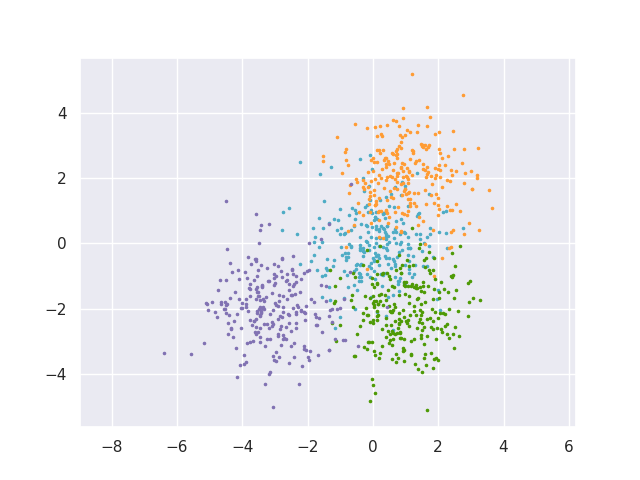

In [62]:
## generate four gaussion blobs
from sklearn.cluster import kmeans_plusplus
from sklearn.datasets import make_blobs

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

# Generate sample data
n_samples = 1000
# n_components = 2

centers=((0,0,0,0),(3,2,2,1),(3,-1,-2,1),(-1,2,-2,-3))
# cstd=0.6
# cstd=1

X, y_true = make_blobs(
    n_samples=n_samples, centers=centers, cluster_std=cstd, random_state=0
)
X = X[:, ::-1]

df_data=pd.DataFrame(data=scaler.fit_transform(X))
df_data['label']=y_true

plt.figure(1)
# colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m","y"]

for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
plt.axis('equal')
plt.show()

In [3]:
## calculate pearson correlation coefficient between all the pairs 

'0.23.1'

<IPython.core.display.Javascript object>


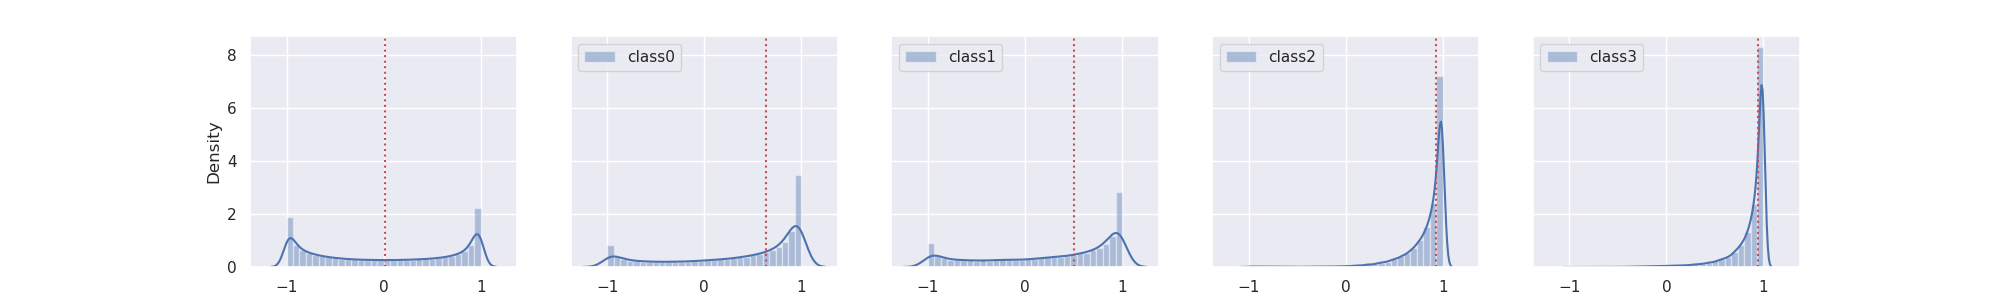

/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

In [61]:
featColNames=[0,1,2]

df_data_negcon=df_data[df_data['label']==0].reset_index(drop=True)
df_data_poscon=df_data[df_data['label']==1].reset_index(drop=True)

df_data_all=[df_data]+[df_data[df_data['label']==i].reset_index(drop=True) for i in range(len(centers))]
# df_data_all=[df_data[df_data['label']==i].reset_index(drop=True) for i in range(len(centers))]
fig, axes = plt.subplots(1,len(df_data_all),figsize=(20,3),sharex=True,sharey=True)
pi=0
for df_d in df_data_all:
    repCorrPurtbs=df_d.loc[:,featColNames].T.corr(method='pearson')
    triuIndices=np.triu_indices(repCorrPurtbs.shape[0], k = 1)
    repCorr=list(repCorrPurtbs.values[triuIndices])
#     sns.histplot(repCorr,bins=60, kde=False,ax=axes[pi])
    sns.distplot(repCorr,kde=True,hist=True,bins=30,label='class'+str(pi-1),ax=axes[pi],norm_hist=True);
    axes[pi].axvline(x=np.median(repCorr),linestyle=':',color='r');
    axes[pi].legend();#axes[i].set_title(title[i]);
    pi+=1
    
axes[0].get_legend().remove();   